Логистическая регрессия или логит-модель — это статистическая модель, используемая для прогнозирования вероятности возникновения некоторого события путем его сравнения с логистической кривой. Эта регреcсия дает ответ в виде вероятности бинарного события.

После изучения этого урока вы будете знать:
*  почему линейная регрессия не всегда способна качественно описать и предсказывать значения зависимой переменной;
*  что такое логистическая регрессия;
*  какие пакеты позволяют строить и исследовать регрессионные модели;
*  как интерпретировать результаты, полученные при построении логистической регрессии.

#Теоретический блок

Линейная регрессия не всегда способна качественно описать и предсказывать значения зависимой переменной. Выбирая для построения модели линейное уравнение, мы естественным образом не накладываем никаких ограничений на значения зависимой переменной, однако эти ограничения могут быть существенными. Как следствие, линейная регрессионная модель может дать бессмысленные результаты. 

**Пример**

Проводится трансплантация почки, требуется оценить вероятность гибели почки в течениее одного года после операции (например, в результате отторжения, ишемии или гибели пациента). Данная операция имеет лишь два возможных исхода: почка функционирует или погибла.

В качестве предикторов исхода трансплантации используется ряд факторов: возраст донора и реципиента, время тепловой и холодовой ишемии почки, длительность пребывания донора в реанимации и т. д.  Если строить модель в классе линейных, т. е. вида $p = a_1 x_1 + a_2 x_2 + \ldots + a_m x_m +a_0,$  где $p$ --- это вероятность гибели почки в течение года после операции, $x_i, i=1, 2, \ldots,m$  ---  это предикторы исхода, $a_i, i=0, 2, \ldots,m$  соответствующие коэффициенты, то при определенных значениях предикторов вероятность, вычисляемая подобным образом, будет либо отрицательной,  больше единицы, что невозможно по определению.

С целью решения данных проблем рассматривают иной класс уравнения регрессии. Именно, пусть  $p$ --- это вероятность прогнозируемого события, $x_i, i=1, 2, \ldots,m$  ---  это предикторы исхода, $a_i, i=0, 2, \ldots,m$  соответствующие коэффициенты. Введем в рассмотрение ненаблюдаемую величину $$y = a_1 x_1 + a_2 x_2 + \ldots + a_m x_m +a_0,$$ которую будем трактовать как "направленность" к событию; чем больше $y,$ тем больше вероятность события. При этом мы не накладываем ограничений на $y,$ которая может принимать значения вне интервала $[0; 1]$ . Вероятность $p$  будем оценивать следующим образом
$$p = \frac{e^y}{1 + e^y}.$$
Справедливы следующие соотношения $p\rightarrow 1$  при $y\rightarrow  +\infty$ и  $p\rightarrow 0$  при $y\rightarrow  -\infty.$ 


Вообще, логит регрессионная модель предназначена для решения задач предсказания значения непрерывной зависимой переменной, при условии, что эта зависимая переменная может принимать значения на интервале от 0 до 1.
В силу такой специфики, ее часто используют для предсказания вероятности наступления некоторого события в зависимости от значений некоторого числа предикторов.

# Задача 1

Явно заданы массивы значения предиктора x и зависимой велчины (регрессора) y:

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

y = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

Построить логистическую регрессию: $$z = b_0 + b_1  x,$$
$$y = \frac{e^z}{1 + e^z}.$$

Данная задача по сути является задачей двоичной классификации на основании наблюдений за одной переменной. Это наиболее простой вид классификационной задачи.

При подготовке моделей классификации вы должны предпринять несколько общих шагов:
* импортировать пакеты, функции и классы;
* ролучить данные для работы и, при необходимости, трансформировать их;
* выписать регрессионную модель (модель классификации) и идентифицировать параметры модели в соответствии  с существующими данными. Данный шаг называется также "тренировкой модели" или "подогонкой моедли";
* оценитть модель, чтобы убедиться, что ее точность удовлетворительна.

Достаточно хорошая модель может использоваться для дальнейших прогнозов, связанных с новыми данными.

### Шаг 1
Начать надо с подключения нужных пакетов.

Пакет scikit-learn - это широко используемая библиотека Python для машинного обучения, построенная на основе NumPy и некоторых других пакетов. Пакет scikit-learn предоставляет средства для предварительной обработки данных, построения регрессии, а так же уменьшения размерности, классификации, кластеризации и многого другого. Пакет scikit-learn имеет открытый исходный код.

Узнать подробнее о логистической регрессии можно на странице https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html.

### Шаг 2

На практике обычно есть какие-то исходные данные для анализа. Для целей этого примера  просто создадим массивы для входных $x$ и выходных $y$ значений.

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
print(x)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


Необходимо вызвать .reshape() для x, потому что этот массив должен быть двумерным, или, если быть более точным, иметь один столбец и столько строк, сколько необходимо. Это может показаться странным при построении *парной* линейной регресии; однако, при построении *множественной* линейной регресии станет очевидно, что данный подход удобен и оправдан.

### Шаг 3

Следующим шагом является создание модели логистической регрессии и ее подгонка (англ. fit) к существующим данным.

Создадим модель как экземпляр LinearRegression. Можно предать LinearRegression несколько дополнительных параметров:
*  fit_intercept
*  n_jobs
*  penalty
*  C
В этом примере используются значения по умолчанию для всех параметров.

После того как модель создана, нужно идентифицировать ее параметры (подогнать ее или обучить). Подгонка модели - это процесс определения коэффициентов $b_0, b_1,...,b_m.$ Погонка модели выполняется с помощью метода .fit ():

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

На этом этапе определена модель классификации.

Можно быстро получить атрибуты построенной модели. Например, атрибут .classes_ представляет собой массив различных значений, которые принимает y.
Это пример двоичной классификации, и $y$ может быть 0 или 1.

Также можно получить значение наклона $b_1$ и $b_0$ следующим образом.

In [ ]:
print(model.classes_)
print(model.intercept_)
print(model.coef_)

[0 1]
[-1.04608067]
[[0.51491375]]


Как видно, $b_0$ задается внутри одномерного массива, а $b_1$ - внутри двумерного массива. Атрибуты  .intercept_ и .coef_ используются, чтобы получить эти результаты.

### Шаг 4

Нужно проверить, насколько качественно моель построена. Для этого можно использовать метод .predict_proba(), который возвращает матрицу вероятностей того, что прогнозируемый результат равен нулю или единице соответственно:

In [ ]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

В приведенной выше матрице каждая строка соответствует одному наблюдению. Первый столбец - это вероятность того, что прогнозируемый результат будет равен нулю, то есть $1 - p(x)$. Второй столбец - это вероятность того, что на выходе будет единица, или $p(x).$

Можно получить фактические прогнозы на основе матрицы вероятностей и значений $p(x)$ с помощью .predict(). Эта функция возвращает предсказанные выходные значения в виде одномерного массива.

На рисунке ниже показаны результаты ввода, вывода и классификации:

In [ ]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

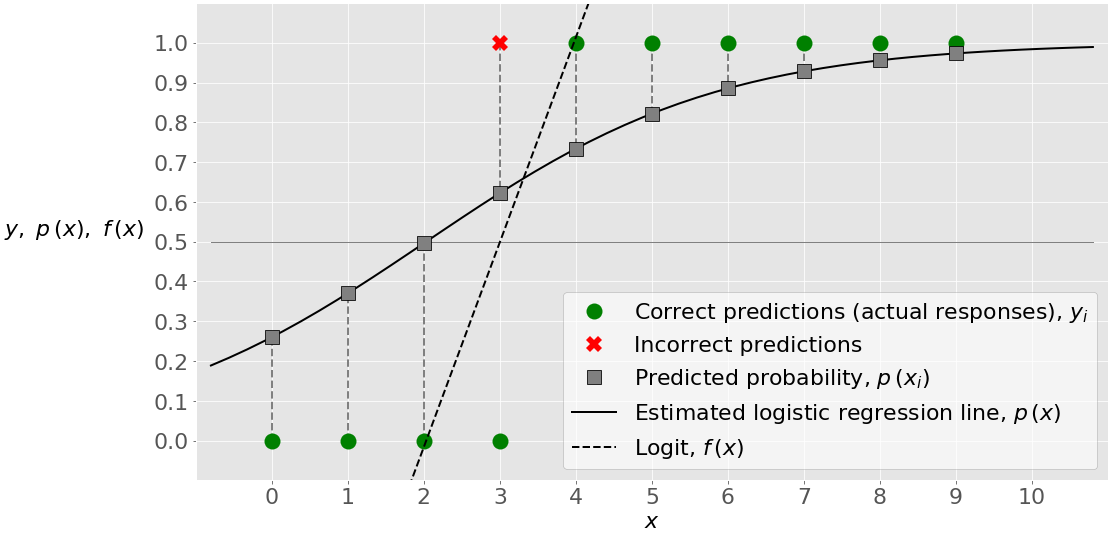

Зеленые круги представляют собой фактические ответы, а также правильные прогнозы. Красный крест соответствует неверному прогнозу. Сплошная черная линия - это соответствует линии логистической регрессии $y = p(x).$ Серые квадраты - это точки на этой линии, которые соответствуют $x$ и значениям во втором столбце матрицы вероятностей. Черная пунктирная линия - логит $b_0 + b_1 x.$

Значение $x$ чуть больше 2 соответствует порогу $p(x) = 0.5,$ или $b_0 + b_1 x = 0.$ Это значение $x$ является границей между значениями, которым соответствуют нули, и значениями, которым соответствуют единицы.

Например, первая точка имеет вход $x= 0,$ фактический выход $y= 0,$ вероятность $p = 0.26$ и прогнозируемое значение 0. Вторая точка имеет $x = 1, y = 0, p = 0.37$ и прогноз 0. Наконец, четвертая точка имеет фактический выход $y = 0$ и вероятность выше 0.5 (при $p = 0.62$), поэтому она ошибочно классифицируется как 1. Все остальные значения предсказываются правильно.

Если девять из десяти наблюдений классифицируются правильно, точность модели будет равна 9/10 = 0.9. Найти точность можно с помощью .score():

In [ ]:
model.score(x, y)

0.9

Метод .score() принимает входные и выходные данные в качестве аргументов и возвращает отношение количества правильных прогнозов к количеству наблюдений.

Можно получить больше информации о точности модели с помощью матрицы ошибок (англ. confusion matrix). В случае бинарной классификации матрица ошибок показывает следующие числа:

* истинные негативы в верхнем левом углу,
* ложные негативы в нижнем левом углу,
* ложные срабатывания в правом верхнем углу,
* истинные плюсы в правом нижнем углу.

Чтобы создать матрицу ошибок, можно использовать метод confusion_matrix() и предоставить фактические и прогнозируемые результаты в качестве аргументов:

In [ ]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]])

Часто бывает полезно визуализировать матрицу ошибок. Можно сделать это с помощью метода .imshow() из пакета matplotlib, который принимает матрицу ошибок в качестве аргумента:

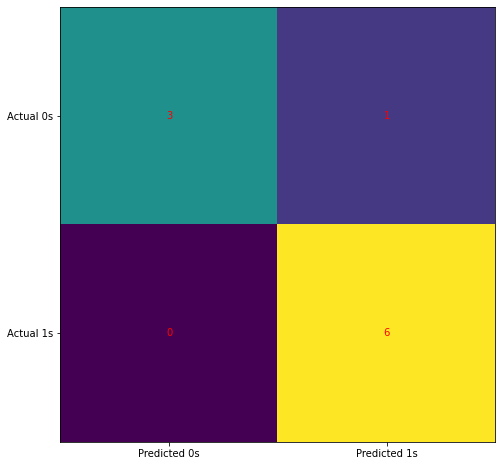

In [ ]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Более полный отчет о классификации можно получить с помощью метода classification_report():

In [ ]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



### Шаг 5

Улучшение модели за счет подбора других параметров. Можно улучшить модель, задав другие значения параметров. Например, можно задать параметр регуляризации C = 10.0 вместо значения по умолчанию 1.0:

In [ ]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

Параметры модели следующие

In [ ]:
model.intercept_

array([-3.51335372])

In [ ]:
model.coef_

array([[1.12066084]])

На основе меодли получена следующая матрица вероятностей и предстказанные значения:

In [ ]:
model.predict_proba(x)

array([[0.97106534, 0.02893466],
       [0.9162684 , 0.0837316 ],
       [0.7810904 , 0.2189096 ],
       [0.53777071, 0.46222929],
       [0.27502212, 0.72497788],
       [0.11007743, 0.88992257],
       [0.03876835, 0.96123165],
       [0.01298011, 0.98701989],
       [0.0042697 , 0.9957303 ],
       [0.00139621, 0.99860379]])

В этом случае получаются все истинные прогнозы, что видно матрице ошибок и отчете о классификации:

In [ ]:
model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
model.score(x, y)

1.0

In [ ]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]])

In [ ]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



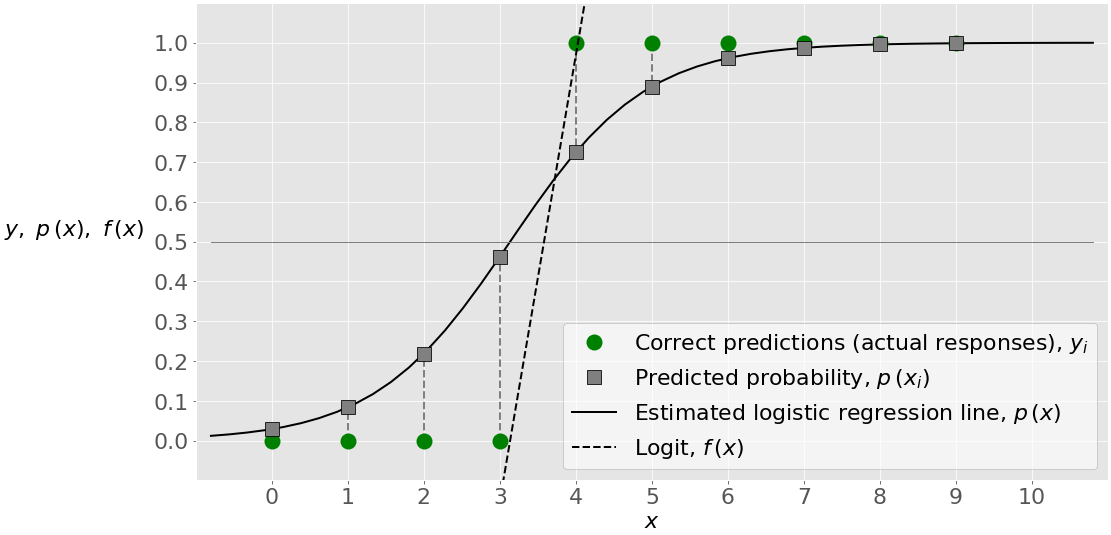

Также можно реализовать логистическую регрессию в Python с помощью пакета StatsModels. Обычно это требуется, когда нужно больше статистических данных, связанных с моделями и результатами. Процедура аналогична scikit-learn.

# Задача 2

Построение логистической регрессии с помощью пакета statmodels.

### Шаг 1

Импортирование пакетов

In [ ]:
import numpy as np
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Шаг 2

Можно получать входные и выходные данные так же, как и в scikit-learn. Однако StatsModels не принимает во внимание константу $b_0,$ и необходимо включить дополнительный столбец единиц в $x.$ Делается это с помощью метода add_constant():

In [ ]:
x = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]).reshape(-1, 1)
print(x)
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
x = sm.add_constant(x)
print(x)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


Метод add_constant() принимает массив x в качестве аргумента и возвращает новый массив с дополнительным столбцом единиц. Вот как выглядят x и y:

In [ ]:
print(x)
print(y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]


### Шаг 3

Модель логистической регрессии будет экземпляром класса statsmodels.discrete.discrete_model.Logit. Вот как можно его создать:

In [ ]:
model = sm.Logit(y, x)

Теперь, когда модель создана, ее надо подогнать к существующим данным. Это можно сделать с помощью метода .fit() или, если нужно применить регуляризацию L1, то с помощью .fit_regularized():

In [ ]:
result = model.fit_regularized(method='l1')

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.15697444321927695
            Iterations: 37
            Function evaluations: 38
            Gradient evaluations: 37


Теперь модель готова, и переменная result содержит полезные данные. Например, вы можете получить значения $b_0$ и $b_1$ с помощью свойства .params:

In [ ]:
result.params

array([-2.07942938, 24.65099906])

### Шаг 4

Можно использовать result, чтобы получить вероятность того, что прогнозируемые результаты будут равны единице:

In [ ]:
result.predict(x)

array([0.11111231, 0.11111231, 0.11111231, 0.11111231, 0.11111231,
       0.11111231, 0.11111231, 0.11111231, 0.11111231, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

.summary () и .summary2 () дают выходные данные, которые могут оказаться полезными в некоторых случаях:


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Thu, 23 Dec 2021   Pseudo R-squ.:                  0.7668
Time:                        14:50:31   Log-Likelihood:                -3.1395
converged:                       True   LL-Null:                       -13.460
Covariance Type:            nonrobust   LLR p-value:                 5.538e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0794      1.061     -1.961      0.050      -4.158      -0.001
x1            24.6510    2.4e+04      0.001      0.999   -4.71e+04    4.71e+04
==============================================================================

Possibly complete quasi-separation: A fraction 0.55 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.767     
Dependent Variable: y                AIC:              10.2790   
Date:               2021-12-23 14:50 BIC:              12.2704   
No. Observations:   20               Log-Likelihood:   -3.1395   
Df Model:           1                LL-Null:          -13.460   
Df Residuals:       18               LLR p-value:      5.5383e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     37.0000                                      
-----------------------------------------------------------------
          Coef.   Std.Err.     z    P>|z|     [0.025     0.975]  
-----------------------------------------------------------------
const    -2.0794     1.0607 -1.9605 0.0499     -4.1583    -0.0006
x1       24.6510 24024.6932  0.0010 0.9992 -47062.8824 47112.1844
=================================================================

"""

# Задача 3

Предыдущие примеры иллюстрировали реализацию логистической регрессии в Python, а также некоторые детали, связанные с этим методом. В данном примере показано, как использовать логистическую регрессию для решения реальной проблемы классификации. Подход очень похож на то, что было сделано в предыдущих примерах, но с набор данных на этот раз большой и появляются некоторые дополнительные проблемамы.

Этот пример касается распознавания изображений. Если быть более точным,требуется распознать рукописные цифры. Используется набор данных с 1797 наблюдений, каждое из которых представляет собой изображение одной рукописной цифры. Каждое изображение имеет размер 64 пикселя, ширину 8 пикселей и высоту 8 пикселей.

Чтобы узнать больше об этом наборе данных, см. официальную документацию,
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
x, y = load_digits(return_X_y=True)
print(x[1])

[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


In [ ]:
x_train, x_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [ ]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [ ]:
x_test = scaler.transform(x_test)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
model.score(x_train, y_train)

0.964509394572025

In [ ]:
model.score(x_test, y_test)

0.9416666666666667

In [ ]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]])

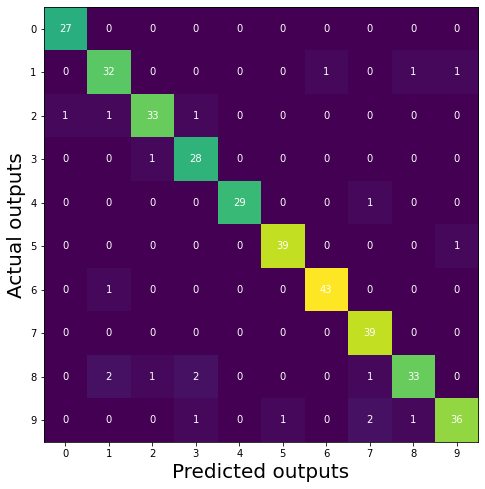

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)

ax.set_xlabel('Predicted outputs', fontsize=20, color='black')
ax.set_ylabel('Actual outputs', fontsize=20, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



# Рекомендации по чтению

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://realpython.com/logistic-regression-python/#logistic-regression-overview